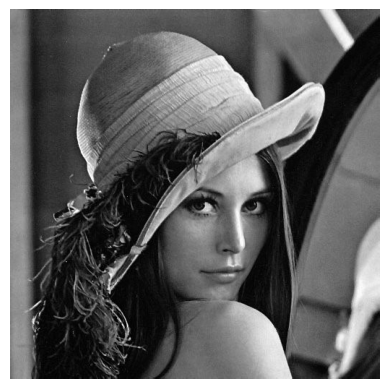

In [4]:
import cv2
import matplotlib.pyplot as plt
image_path = '/content/Picture1.jpg'

bgr_image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

In [15]:
print(f"Height: {rgb_image.shape[0]}\nWidth: {rgb_image.shape[1]}\nChannels: {rgb_image.shape[2]}")
print(f"Total Pixels: {rgb_image.shape[0]} x {rgb_image.shape[1]}")

Height: 512
Width: 512
Channels: 3
Total Pixels: 512 x 512


(-0.5, 511.5, 511.5, -0.5)

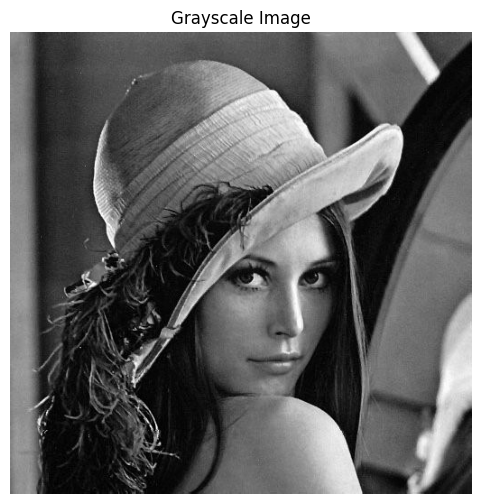

In [19]:
gray_image=cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(8, 6))
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.title("Grayscale Image")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

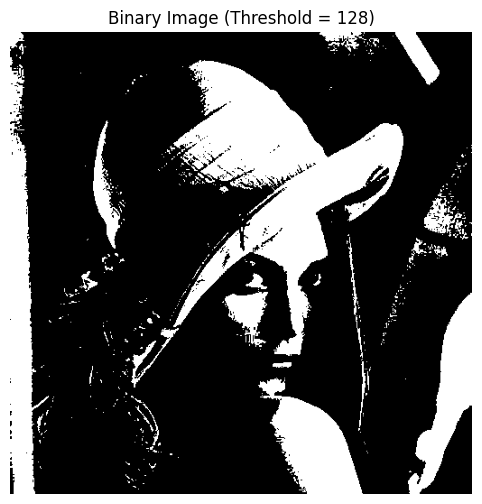

In [20]:
threshold_value = 128

_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 6))
plt.imshow(binary_image, cmap='gray')
plt.title(f'Binary Image (Threshold = {threshold_value})')
plt.axis('off')

In [22]:
import numpy as np
print(f"Black Pixels: {np.sum(binary_image==0)}")

Black Pixels: 200660


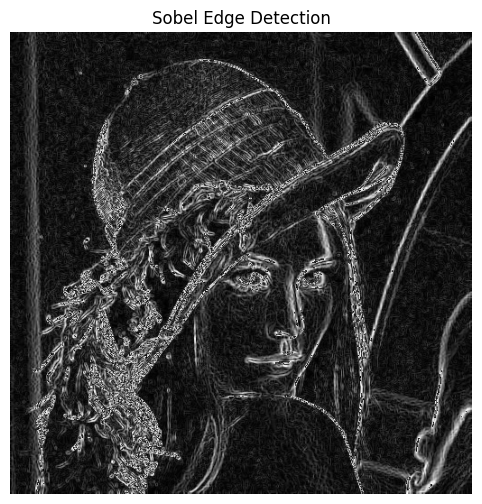

In [24]:
from skimage import filters
from skimage import feature
# Apply Sobel Operator
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
sobel = cv2.magnitude(sobelx, sobely)  # Combine horizontal and vertical edges

# Convert to uint8
sobel = np.uint8(np.absolute(sobel))

# Display the Sobel Edge Detection Result
plt.figure(figsize=(8, 6))
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()


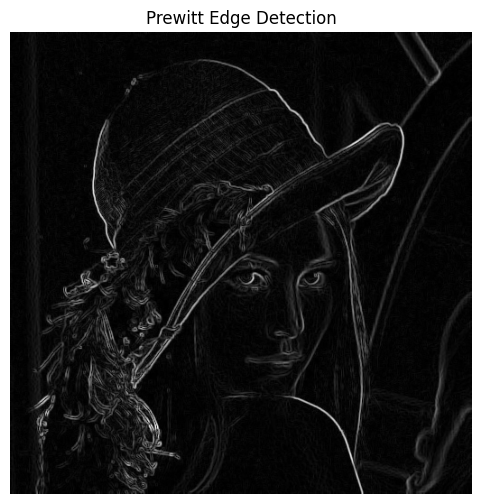

In [25]:
# Apply Prewitt Operator using scikit-image
prewitt_edges = filters.prewitt(gray_image)

# Display the Prewitt Edge Detection Result
plt.figure(figsize=(8, 6))
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')
plt.show()

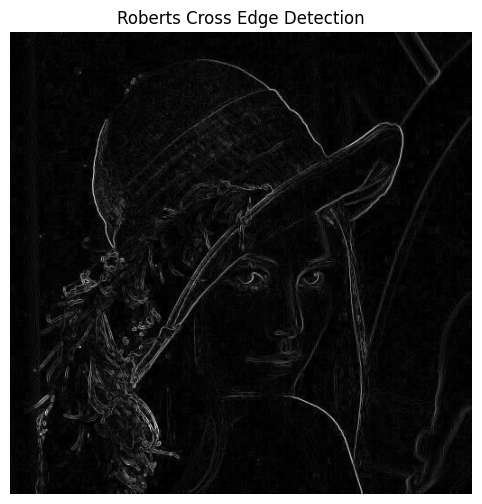

In [26]:
# Apply Roberts Cross Operator using scikit-image
roberts_edges = filters.roberts(gray_image)

# Display the Roberts Cross Edge Detection Result
plt.figure(figsize=(8, 6))
plt.imshow(roberts_edges, cmap='gray')
plt.title('Roberts Cross Edge Detection')
plt.axis('off')
plt.show()


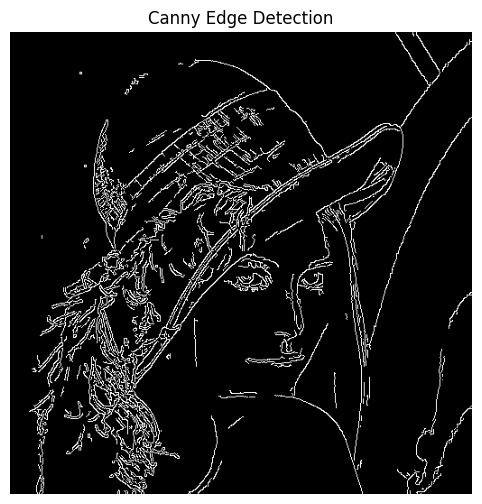

In [27]:
# Apply Canny Edge Detector
# Parameters: (image, threshold1, threshold2)
# You may need to adjust the thresholds based on your image
canny_edges = cv2.Canny(gray_image, 100, 200)

# Display the Canny Edge Detection Result
plt.figure(figsize=(8, 6))
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


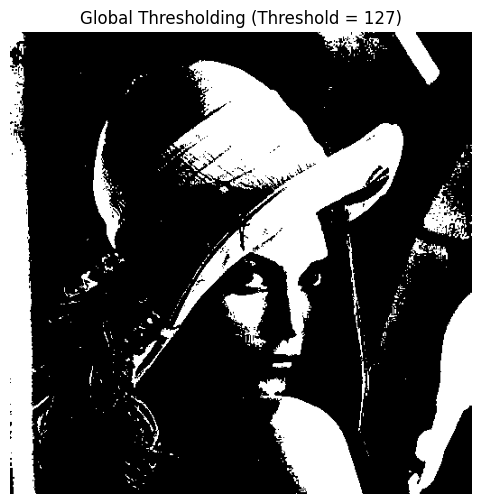

In [29]:
from skimage import filters, segmentation, color, morphology, feature
from skimage.util import img_as_ubyte
# Global Thresholding
# Define a threshold value
global_thresh = 127  # You can adjust this value

# Apply global thresholding
_, global_thresh_image = cv2.threshold(gray_image, global_thresh, 255, cv2.THRESH_BINARY)

# Display the Result
plt.figure(figsize=(6, 6))
plt.imshow(global_thresh_image, cmap='gray')
plt.title(f'Global Thresholding (Threshold = {global_thresh})')
plt.axis('off')
plt.show()

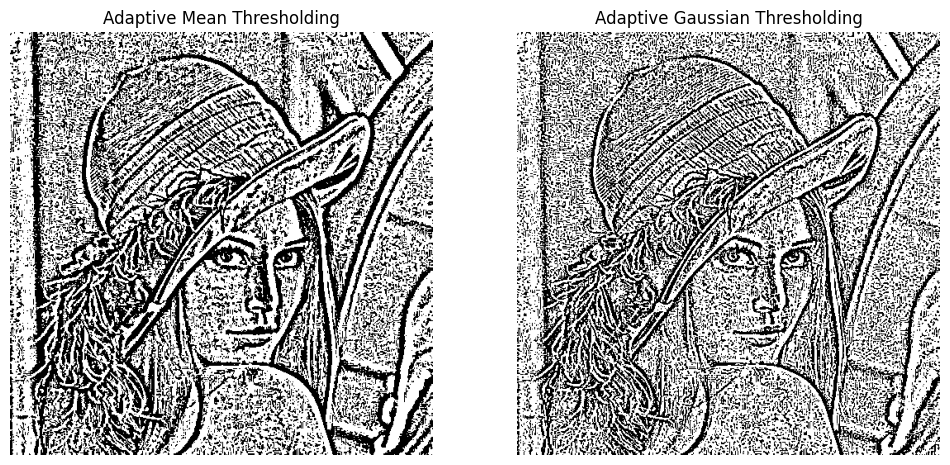

In [30]:
# Adaptive Thresholding
# Parameters for adaptiveThreshold:
# - src: Source image (should be grayscale)
# - maxValue: Non-zero value assigned to pixels exceeding the threshold
# - adaptiveMethod: Adaptive thresholding algorithm to use
# - thresholdType: Type of thresholding
# - blockSize: Size of the pixel neighborhood used to calculate the threshold
# - C: Constant subtracted from the mean or weighted mean

# Apply Adaptive Mean Thresholding
adaptive_mean = cv2.adaptiveThreshold(
    gray_image,
    255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    blockSize=11,
    C=2
)

# Apply Adaptive Gaussian Thresholding
adaptive_gaussian = cv2.adaptiveThreshold(
    gray_image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    blockSize=11,
    C=2
)

# Display the Results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(adaptive_mean, cmap='gray')
plt.title('Adaptive Mean Thresholding')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')
plt.axis('off')

plt.show()


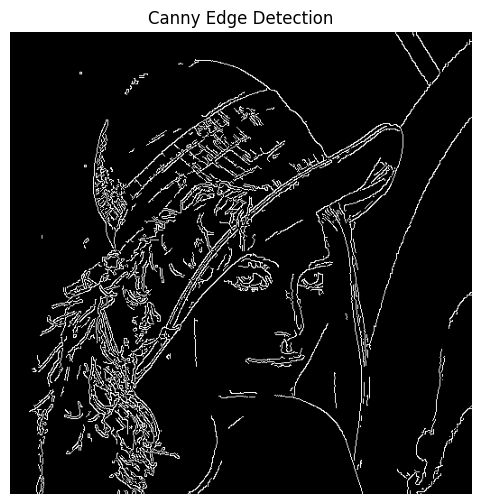

In [31]:
# Canny Edge Detection
# Parameters: (image, threshold1, threshold2, apertureSize, L2gradient)
# threshold1 and threshold2 are the lower and upper thresholds for the hysteresis procedure

# Apply Canny Edge Detector
canny_edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

# Display the Result
plt.figure(figsize=(6, 6))
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


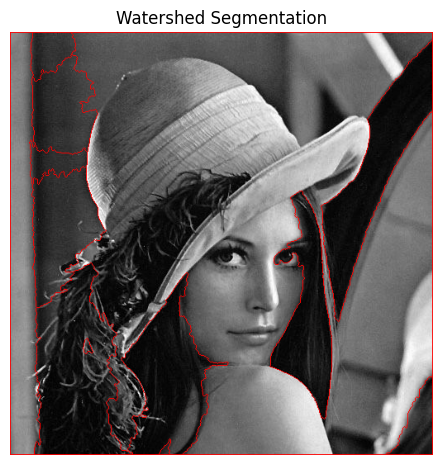

In [35]:
# Watershed Algorithm for Image Segmentation

# Step 1: Noise Reduction
# Apply a threshold to get the foreground
ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Step 2: Morphological Operations
# Remove noise and separate touching objects
# Morphological opening (remove small objects from the foreground)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Step 3: Sure Background Area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Step 4: Sure Foreground Area
# Use distance transform and threshold
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Step 5: Unknown Region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Step 6: Marker Labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the unknown region with zero
markers[unknown == 255] = 0

# Step 7: Apply Watershed
markers = cv2.watershed(rgb_image, markers)

# Step 8: Mark Boundaries in Red
segmented_image = rgb_image.copy()
segmented_image[markers == -1] = [255, 0, 0]  # Boundaries marked in red

# Display the Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Watershed Segmentation')
plt.axis('off')

plt.show()
